# Shapefile 范围查看与坐标系转换工具

本工具用于**查看 Shapefile 文件的空间范围并进行坐标系转换**。支持可视化展示数据范围，并可选添加在线底图。

## 主要功能

1. 读取并显示 Shapefile 的基本信息（坐标系、属性表等）
2. 可视化展示地理数据
3. 添加在线底图（OpenStreetMap、CartoDB 等）
4. 坐标系转换（如转换到 Web Mercator 或 UTM）
5. 计算空间范围和面积

> **依赖库**  
> - GeoPandas
> - Matplotlib
> - Contextily（在线底图）
> 
> 安装命令：  
> ```bash
> pip install geopandas matplotlib contextily
> ```

       id name           site  \
0  341823   泾县  www.poi86.com   
1  341802  宣州区  www.poi86.com   
2  341881  宁国市  www.poi86.com   
3  341824  绩溪县  www.poi86.com   
4  341882  广德市  www.poi86.com   

                                            geometry  
0  POLYGON ((118.49 30.821, 118.49 30.822, 118.49...  
1  POLYGON ((118.58 30.99, 118.58 30.997, 118.57 ...  
2  MULTIPOLYGON (((118.61 30.874, 118.61 30.871, ...  
3  POLYGON ((118.69 30.317, 118.69 30.317, 118.69...  
4  POLYGON ((119.53 31.161, 119.53 31.161, 119.53...  
None


C:\Users\lishuhao\AppData\Local\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


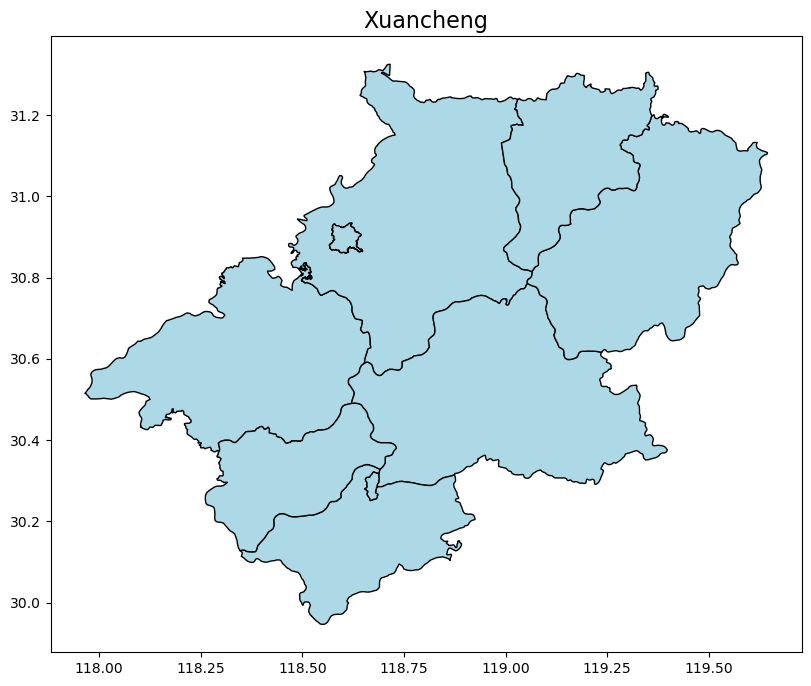

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. 读取你的 shapefile
shp_path = r"E:/项目管理/新奥宣城管线/数据/宣城市边界_341800_Shapefile_(poi86.com)/341800.shp"
gdf = gpd.read_file(shp_path)

# 2. 打印基本信息
print(gdf.head())
print(gdf.crs)

# 3. 绘制
gdf.plot(figsize=(10, 8), edgecolor="black", facecolor="lightblue")
plt.title("Xuancheng", fontsize=16)
plt.show()


## 1. 读取 Shapefile 并查看基本信息

In [3]:
pip install contextily


   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
    --------------------------------------- 0.5/25.4 MB 2.8 MB/s eta 0:00:09
   ----- ---------------------------------- 3.4/25.4 MB 9.1 MB/s eta 0:00:03
   ------------ --------------------------- 7.9/25.4 MB 15.2 MB/s eta 0:00:02
   ------------ --------------------------- 7.9/25.4 MB 15.2 MB/s eta 0:00:02
   -------------- ------------------------- 9.2/25.4 MB 9.1 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.4 MB 8.5 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.4 MB 8.5 MB/s eta 0:00:02
   -------------- ------------------------- 9.4/25.4 MB 8.5 MB/s eta 0:00:02
   ------------------- -------------------- 12.6/25.4 MB 7.2 MB/s eta 0:00:02
   ------------------------ --------------- 15.7/25.4 MB 7.8 MB/s eta 0:00:02
   --------------------------- ------------ 17.6/25.4 MB 7.6 MB/s eta 0:00:02
   -----

In [2]:
import contextily as ctx


## 2. 添加在线底图可视化

将数据投影到 Web Mercator (EPSG:3857) 以匹配在线地图服务。

HTTPError: Connection reset by peer too many times. Last message was: 503 Error: No healthy IP available for the backend for url: https://stamen-tiles-a.a.ssl.fastly.net/terrain/9/423/208.png

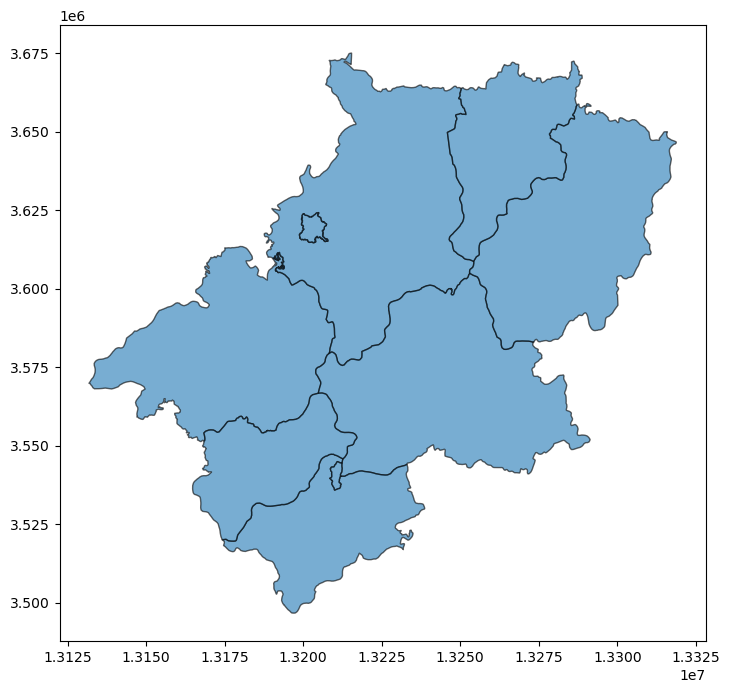

In [6]:

# 若不是3857，需要重投影
gdf_3857 = gdf.to_crs(epsg=3857)

ax = gdf_3857.plot(figsize=(10, 8), alpha=0.6, edgecolor="black")
ctx.add_basemap(ax, crs=gdf_3857.crs, source=ctx.providers.Stamen.Terrain)

plt.title("Shapefile With Basemap")
plt.show()

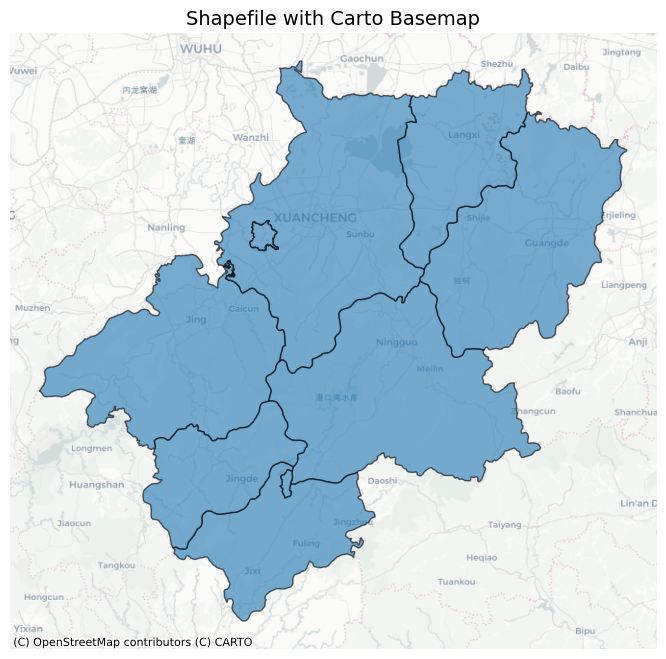

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

gdf_3857.plot(ax=ax, alpha=0.6, edgecolor="black")

# ⭐ 换成 Carto 的底图，而不是 Stamen
# 你可以试：
#   ctx.providers.CartoDB.Positron
#   ctx.providers.CartoDB.Voyager
#   ctx.providers.OpenStreetMap.Mapnik
try:
    ctx.add_basemap(
        ax,
        crs=gdf_3857.crs,
        source=ctx.providers.CartoDB.Positron,
    )
except Exception as e:
    print("⚠ 无法加载网络底图：", e)

ax.set_axis_off()
plt.title("Shapefile with Carto Basemap", fontsize=14)
plt.show()

## 3. 使用不同的坐标系



In [8]:
# 将经纬度坐标转换到 UTM Zone 50N（单位：米）
gdf_utm = gdf.to_crs(epsg=32650)
print(gdf_utm.crs)


EPSG:32650


## 4. 坐标系转换与面积计算

转换到 UTM 投影以准确计算面积（单位：平方米）。

In [9]:
# 计算每个 polygon 的面积（单位：平方米）
gdf_utm["area_m2"] = gdf_utm.geometry.area

# 计算总面积
total_area_m2 = gdf_utm["area_m2"].sum()
total_area_km2 = total_area_m2 / 1e6

print("每个面面积（前5个，m²）：")
print(gdf_utm[["area_m2"]].head())

print("\n👉 整个shp的总面积：")
print("   - 平方米：", total_area_m2)
print("   - 平方公里：", total_area_km2)


每个面面积（前5个，m²）：
        area_m2
0  2.036059e+09
1  2.591152e+09
2  2.463811e+09
3  1.105604e+09
4  2.110185e+09

👉 整个shp的总面积：
   - 平方米： 12311887409.036896
   - 平方公里： 12311.887409036895
